<a href="https://colab.research.google.com/github/Maviya5/CE888/blob/master/LAb2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)


[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
	def boostrap_mean(sample, sample_size, n_iterations):
		sam=np.random.choice(sample,(n_iterations,sample_size))
		data_mean=np.mean(sam)
		print(data_mean)
		each_mean=np.mean(sam,axis=1)
		lower=np.percentile(each_mean,2.5)
		upper=np.percentile(each_mean,97.5)
	
		return data_mean, lower, upper


9.139285714285714
9.218311688311688
9.266326530612245
9.201543778801843
9.218675958188154
9.225
9.233384074941451
9.233732394366196
9.20210758377425
9.207519623233908
9.214413012729844
9.21998712998713
9.20086186540732
9.197104689203925
9.231565349544073
9.216792809839168
9.205443655723158
9.218784461152882
9.198705603788477
9.228571428571428
9.21726012793177
9.214949221394718
9.211897220426632
9.214944341372913
9.218891523414346
9.211132612407512
9.221683087027914
9.200877701634159
9.21370106761566
9.218070692194404
9.222683910773611
9.206839687643546
9.219857587894971
9.218141993957705
9.219868035190617
9.212307692307693
9.213153937475267
9.201082017712746
9.198301462317211
9.216888929484837
9.213083363021019
9.216395550921098
9.210697319307771
9.212121312562148
9.209755425979916
9.220883750395945
9.216211651688875
9.209959053685168
9.20652955152955
9.204944719231888
9.202266894781864
9.218105954710651
9.20354263778448
9.201756793112725
9.215476630578294
9.208545501685247
9.218757321

(0.0, 100000.0)

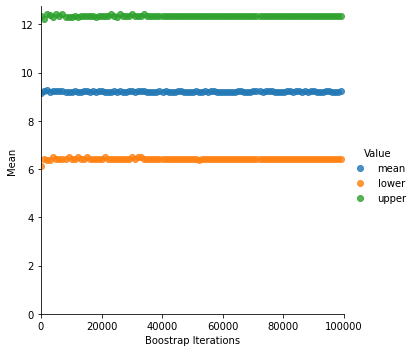

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	new_samples=np.random.choice(sample,(iterations,sample_size))
	data_mean=new_samples.mean()
	sample_means=np.array([])
	for row in new_samples:
		sample_means=np.append(sample_means,row.mean())
	sample_means=np.sort(sample_means)
	limit=(100-ci)/2
	lower=np.percentile(sample_means,limit)
	upper=np.percentile(sample_means,100-limit)
	return data_mean, lower, upper

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])



In [0]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [10]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots



df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
df.head()

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


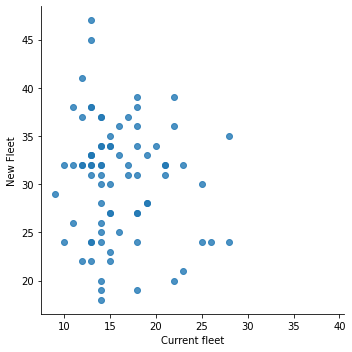

In [11]:
# Compare the two fleets.
sns.lmplot(df.columns[0], df.columns[1],data=df, fit_reg=False)

# You can create a permutation test function to do this. Check the lecture notes!

Text(0.5, 1.0, 'Current Fleet')

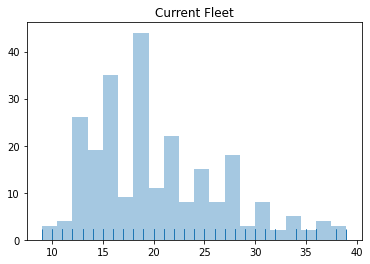

In [12]:
data = df[df.columns[0]].values
sns.distplot(data, bins=20,kde=False, rug=True).set_title("Current Fleet")

Text(0.5, 1.0, 'New fleet')

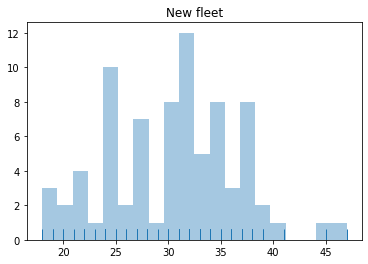

In [13]:
data = df[df.columns[1]].values
sns.distplot(data, bins=20,kde=False, rug=True).set_title("New fleet")

In [0]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
  concat = np.concatenate((data_1,data_2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data_1)]
    pnew = perm[len(data_1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!
data_current_fleet=np.array(df[df.columns[0]].values)
data_new_fleet=np.array(df[df.columns[1]].dropna().values)
mean_current=data_current_fleet.mean()
mean_new=data_new_fleet.mean()
t_obs=mean_new-mean_current

In [16]:
p_val=calc_pvalue(50000,data_current_fleet,data_new_fleet,t_obs)
print(p_val)

0.0


In [17]:
old = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
new = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])
mean_current=old.mean()
mean_new=new.mean()
t_obs=mean_new-mean_current
p_val=calc_pvalue(20000,old,new,t_obs)
print(p_val)

0.03175
